In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Features & target
X = df[['Magnitude', 'Depth', 'SoilType_Encoded', 'Region_Cluster']]
y = df['Magnitude_Class']

# Check & drop rows with missing target (y)
df = df.dropna(subset=['Magnitude_Class'])
X = df[['Magnitude', 'Depth', 'SoilType_Encoded', 'Region_Cluster']]
y = df['Magnitude_Class']

# Define preprocessing: numeric → median, categorical → most frequent
numeric_cols = ['Magnitude', 'Depth']
categorical_cols = ['SoilType_Encoded', 'Region_Cluster']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='median'), numeric_cols),
        ('cat', SimpleImputer(strategy='most_frequent'), categorical_cols)
    ])

# Build pipeline (imputation + logistic regression)
clf = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('model', LogisticRegression(max_iter=500, multi_class='multinomial'))
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit + predict
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("\n=== Logistic Regression Report ===")
print(classification_report(y_test, y_pred))




/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



=== Logistic Regression Report ===
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00      2852
    Moderate       0.93      0.93      0.93        28
      Strong       0.00      0.00      0.00         2

    accuracy                           1.00      2882
   macro avg       0.64      0.64      0.64      2882
weighted avg       1.00      1.00      1.00      2882



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



=== Decision Tree Report ===
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00      2852
    Moderate       1.00      1.00      1.00        28
      Strong       1.00      1.00      1.00         2

    accuracy                           1.00      2882
   macro avg       1.00      1.00      1.00      2882
weighted avg       1.00      1.00      1.00      2882



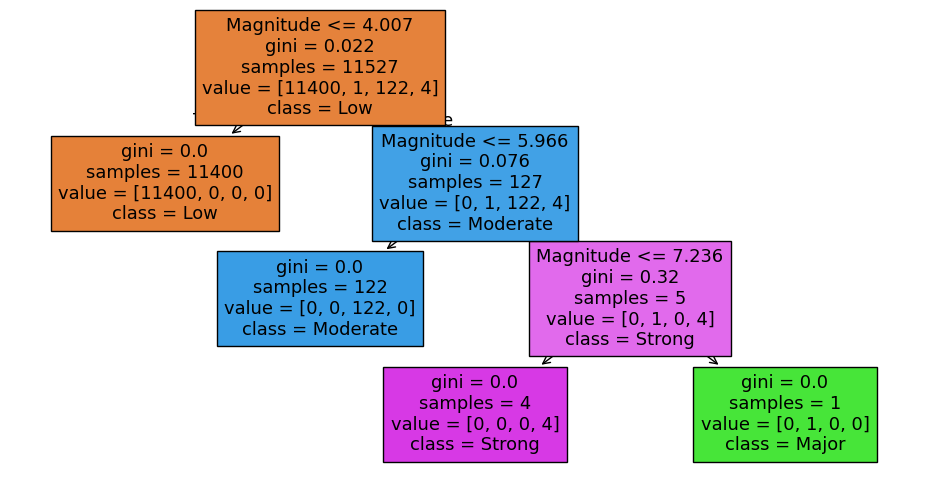

In [ ]:
#w
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(X_train, y_train)

y_pred_tree = tree.predict(X_test)
print("\n=== Decision Tree Report ===")
print(classification_report(y_test, y_pred_tree))

# Visualize tree
plt.figure(figsize=(12,6))
plot_tree(tree, feature_names=X.columns, class_names=tree.classes_, filled=True)
plt.show()


Logistic Regression Accuracy: 0.999
Decision Tree Accuracy: 1.000


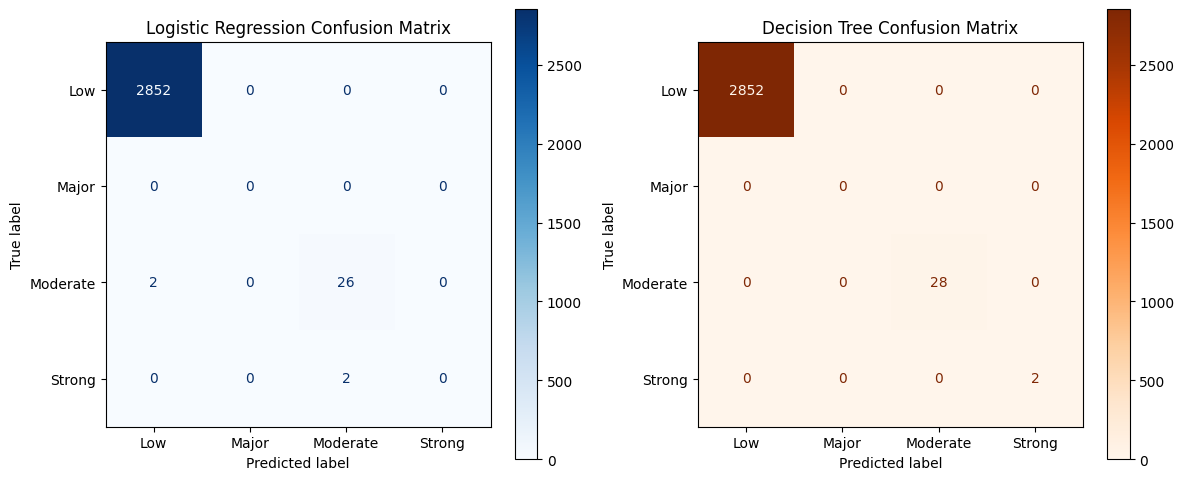

In [ ]:


#t
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

# Logistic Regression
acc_log = accuracy_score(y_test, y_pred)
cm_log = confusion_matrix(y_test, y_pred, labels=clf.named_steps['model'].classes_)

# Decision Tree
acc_tree = accuracy_score(y_test, y_pred_tree)
cm_tree = confusion_matrix(y_test, y_pred_tree, labels=tree.classes_)

print(f"Logistic Regression Accuracy: {acc_log:.3f}")
print(f"Decision Tree Accuracy: {acc_tree:.3f}")

# Confusion Matrix Plots
fig, axes = plt.subplots(1, 2, figsize=(12,5))

ConfusionMatrixDisplay(cm_log, display_labels=clf.named_steps['model'].classes_).plot(ax=axes[0], cmap="Blues")
axes[0].set_title("Logistic Regression Confusion Matrix")

ConfusionMatrixDisplay(cm_tree, display_labels=tree.classes_).plot(ax=axes[1], cmap="Oranges")
axes[1].set_title("Decision Tree Confusion Matrix")

plt.tight_layout()
plt.show()



In [ ]:
#f
results = pd.DataFrame({
    "Model": ["Logistic Regression", "Decision Tree"],
    "Accuracy": [acc_log, acc_tree]
})

print("\n=== Baseline Model Comparison ===")
print(results)

# Save baseline model results
results.to_csv("/content/baseline_results_week3.csv", index=False)



=== Baseline Model Comparison ===
                 Model  Accuracy
0  Logistic Regression  0.998612
1        Decision Tree  1.000000


**Advanced Models & Hyperparameter Tuning**



⚠️ Dropping rare classes: ['Major']


/tmp/ipython-input-2668715684.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Magnitude'] = X['Magnitude'].fillna(X['Magnitude'].median())
/tmp/ipython-input-2668715684.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Depth'] = X['Depth'].fillna(X['Depth'].median())
/tmp/ipython-input-2668715684.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:


✅ Random Forest Accuracy: 1.000

📊 Classification Report:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00      2851
    Moderate       1.00      1.00      1.00        30
      Strong       1.00      1.00      1.00         1

    accuracy                           1.00      2882
   macro avg       1.00      1.00      1.00      2882
weighted avg       1.00      1.00      1.00      2882



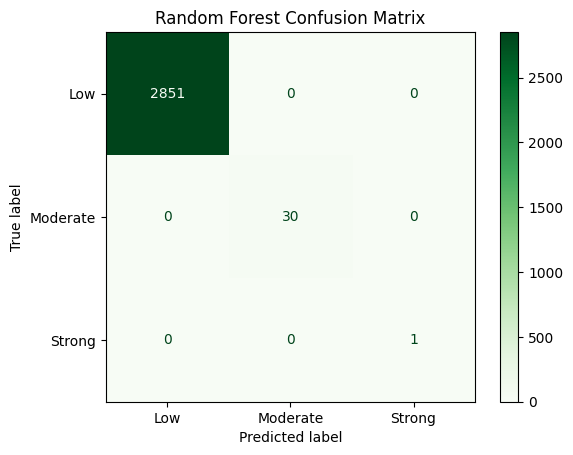


✅ Random Forest model saved as: random_forest_day1.pkl


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib

# -----------------------------
# 1️⃣ Load Dataset
# -----------------------------
df = pd.read_csv("/content/earthquake_features_day4.csv")

# -----------------------------
# 2️⃣ Drop missing target rows
# -----------------------------
df = df.dropna(subset=['Magnitude_Class'])

# -----------------------------
# 3️⃣ Drop rare classes (<2 samples)
# -----------------------------
class_counts = df['Magnitude_Class'].value_counts()
rare_classes = class_counts[class_counts < 2].index
if len(rare_classes) > 0:
    print(f"⚠️ Dropping rare classes: {list(rare_classes)}")
    df = df[~df['Magnitude_Class'].isin(rare_classes)]

# -----------------------------
# 4️⃣ Define Features & Target
# -----------------------------
X = df[['Magnitude', 'Depth', 'SoilType_Encoded', 'Region_Cluster']]
y = df['Magnitude_Class']

# -----------------------------
# 5️⃣ Handle Missing Values
# -----------------------------
X['Magnitude'] = X['Magnitude'].fillna(X['Magnitude'].median())
X['Depth'] = X['Depth'].fillna(X['Depth'].median())
X['SoilType_Encoded'] = X['SoilType_Encoded'].fillna(X['SoilType_Encoded'].mode()[0])
X['Region_Cluster'] = X['Region_Cluster'].fillna(X['Region_Cluster'].mode()[0])

# -----------------------------
# 6️⃣ Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# 7️⃣ Train Random Forest
# -----------------------------
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'  # Automatically handles class imbalance
)
rf.fit(X_train, y_train)

# -----------------------------
# 8️⃣ Predictions & Metrics
# -----------------------------
y_pred = rf.predict(X_test)

print(f"\n✅ Random Forest Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=rf.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=rf.classes_)
disp.plot(cmap="Greens")
plt.title("Random Forest Confusion Matrix")
plt.show()

# -----------------------------
# 9️⃣ Save Model
# -----------------------------
joblib.dump(rf, "/content/random_forest_day1.pkl")
print("\n✅ Random Forest model saved as: random_forest_day1.pkl")


⚠️ Dropping rare classes: ['Major']

Class Weights: {0: 0.3369879835102184, 1: 32.016666666666666, 2: 768.4}


/tmp/ipython-input-549484722.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Magnitude'] = X['Magnitude'].fillna(X['Magnitude'].median())
/tmp/ipython-input-549484722.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Depth'] = X['Depth'].fillna(X['Depth'].median())
/tmp/ipython-input-549484722.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://p


✅ XGBoost Accuracy: 1.000

📊 Classification Report:
              precision    recall  f1-score   support

         Low       1.00      1.00      1.00      2851
    Moderate       1.00      1.00      1.00        30
      Strong       1.00      1.00      1.00         1

    accuracy                           1.00      2882
   macro avg       1.00      1.00      1.00      2882
weighted avg       1.00      1.00      1.00      2882



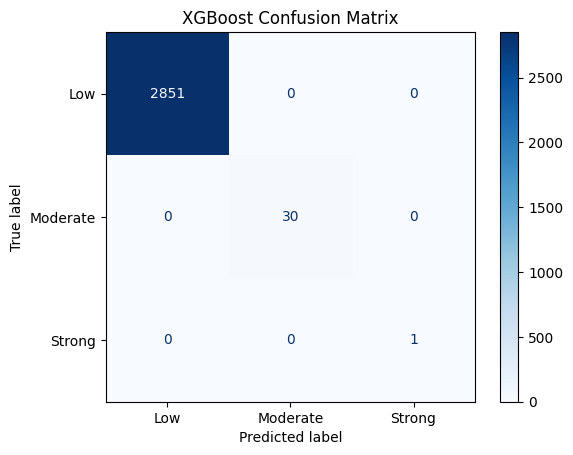


✅ XGBoost model saved as: xgboost_day2.pkl
✅ Label encoder saved as: label_encoder.pkl


In [ ]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib

# -----------------------------
# 1️⃣ Load Dataset
# -----------------------------
df = pd.read_csv("/content/earthquake_features_day4.csv")

# -----------------------------
# 2️⃣ Drop missing target rows
# -----------------------------
df = df.dropna(subset=['Magnitude_Class'])

# -----------------------------
# 3️⃣ Drop rare classes (<2 samples)
# -----------------------------
class_counts = df['Magnitude_Class'].value_counts()
rare_classes = class_counts[class_counts < 2].index
if len(rare_classes) > 0:
    print(f"⚠️ Dropping rare classes: {list(rare_classes)}")
    df = df[~df['Magnitude_Class'].isin(rare_classes)]

# -----------------------------
# 4️⃣ Encode target labels
# -----------------------------
le = LabelEncoder()
df['Magnitude_Class_Encoded'] = le.fit_transform(df['Magnitude_Class'])

# -----------------------------
# 5️⃣ Define Features & Target
# -----------------------------
X = df[['Magnitude', 'Depth', 'SoilType_Encoded', 'Region_Cluster']]
y = df['Magnitude_Class_Encoded']

# -----------------------------
# 6️⃣ Handle Missing Values
# -----------------------------
X['Magnitude'] = X['Magnitude'].fillna(X['Magnitude'].median())
X['Depth'] = X['Depth'].fillna(X['Depth'].median())
X['SoilType_Encoded'] = X['SoilType_Encoded'].fillna(X['SoilType_Encoded'].mode()[0])
X['Region_Cluster'] = X['Region_Cluster'].fillna(X['Region_Cluster'].mode()[0])

# -----------------------------
# 7️⃣ Train-Test Split
# -----------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# -----------------------------
# 8️⃣ Compute sample weights for class imbalance
# -----------------------------
class_counts_train = pd.Series(y_train).value_counts()
total = len(y_train)
class_weights = {cls: total / (len(class_counts_train) * count) for cls, count in class_counts_train.items()}
sample_weights = pd.Series(y_train).map(class_weights)
print("\nClass Weights:", class_weights)

# -----------------------------
# 9️⃣ Train XGBoost Model
# -----------------------------
xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    objective='multi:softmax',
    num_class=len(le.classes_)
)

xgb.fit(X_train, y_train, sample_weight=sample_weights)

# -----------------------------
# 🔟 Predictions & Metrics
# -----------------------------
y_pred = xgb.predict(X_test)
y_test_decoded = le.inverse_transform(y_test)
y_pred_decoded = le.inverse_transform(y_pred)

acc = accuracy_score(y_test_decoded, y_pred_decoded)
print(f"\n✅ XGBoost Accuracy: {acc:.3f}")
print("\n📊 Classification Report:")
print(classification_report(y_test_decoded, y_pred_decoded))

# Confusion Matrix
cm = confusion_matrix(y_test_decoded, y_pred_decoded, labels=le.classes_)
disp = ConfusionMatrixDisplay(cm, display_labels=le.classes_)
disp.plot(cmap="Blues")
plt.title("XGBoost Confusion Matrix")
plt.show()

# -----------------------------
# 1️⃣1️⃣ Save Model & Encoder
# -----------------------------
joblib.dump(xgb, "/content/xgboost_day2.pkl")
joblib.dump(le, "/content/label_encoder.pkl")
print("\n✅ XGBoost model saved as: xgboost_day2.pkl")
print("✅ Label encoder saved as: label_encoder.pkl")


In [ ]:
#w
# Day 3 – Cross-Validation for Random Forest & XGBoost

from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# Stratified K-Fold setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("\n Running Cross-Validation for Random Forest...")

# Random Forest WITHOUT class_weight during CV to avoid failure
rf_cv_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
)

rf_cv_scores = cross_val_score(rf_cv_model, X_train, y_train, cv=skf, scoring='accuracy')
print("Fold Accuracies:", rf_cv_scores)
print("Mean Accuracy:", rf_cv_scores.mean())

print("\nRunning Cross-Validation for XGBoost...")

xgb_cv_model = xgb.XGBClassifier(
    objective="multi:softmax",
    num_class=4,
    eval_metric="mlogloss",
    learning_rate=0.1,
    max_depth=6,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

xgb_cv_scores = cross_val_score(xgb_cv_model, X_train, y_train, cv=skf, scoring='accuracy')
print("Fold Accuracies:", xgb_cv_scores)
print("Mean Accuracy:", xgb_cv_scores.mean())



 Running Cross-Validation for Random Forest...
Fold Accuracies: [1.         1.         0.99956616 1.         1.        ]
Mean Accuracy: 0.9999132321041214

Running Cross-Validation for XGBoost...
Fold Accuracies: [1. 1. 1. 1. 1.]
Mean Accuracy: 1.0


In [ ]:
#t
import pickle
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Assuming you already have:
# X_train, X_test, y_train, y_test
# Label-encoded y values: 0, 1, 2, 3

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# 1. RANDOM FOREST TUNING
rf_model = RandomForestClassifier(random_state=42)

rf_param_dist = {
    "n_estimators": [100, 200, 300, 500],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "bootstrap": [True, False]
}

rf_search = RandomizedSearchCV(
    estimator=rf_model,
    param_distributions=rf_param_dist,
    n_iter=10,
    cv=skf,
    scoring="accuracy",
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("Tuning Random Forest...")
rf_search.fit(X_train, y_train)

best_rf = rf_search.best_estimator_
print("\nBest Random Forest Params:", rf_search.best_params_)

# Evaluate
rf_preds = best_rf.predict(X_test)
rf_acc = accuracy_score(y_test, rf_preds)
print("\nRandom Forest Accuracy (Tuned):", round(rf_acc, 3))
print("\nClassification Report (Random Forest) ")
print(classification_report(y_test, rf_preds))

# Save model
with open("random_forest_tuned.pkl", "wb") as f:
    pickle.dump(best_rf, f)
print("Tuned Random Forest saved as: random_forest_tuned.pkl")


# 2. XGBOOST TUNING
xgb_model = XGBClassifier(
    objective="multi:softmax",
    num_class=4,
    eval_metric="mlogloss",
    random_state=42,
    use_label_encoder=False
)

xgb_param_dist = {
    "n_estimators": [200, 300, 400],
    "max_depth": [4, 6, 8, 10],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.8, 1.0],
    "colsample_bytree": [0.7, 0.8, 1.0],
    "gamma": [0, 1, 5]
}

xgb_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=xgb_param_dist,
    n_iter=10,
    cv=skf,
    scoring="accuracy",
    random_state=42,
    n_jobs=-1,
    verbose=1
)

print("\nTuning XGBoost...")
xgb_search.fit(X_train, y_train)

best_xgb = xgb_search.best_estimator_
print("\nBest XGBoost Params:", xgb_search.best_params_)

# Evaluate
xgb_preds = best_xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_preds)
print("\nXGBoost Accuracy (Tuned):", round(xgb_acc, 3))
print("\n=== Classification Report (XGBoost) ===")
print(classification_report(y_test, xgb_preds))

# Save model
with open("xgboost_tuned.pkl", "wb") as f:
    pickle.dump(best_xgb, f)
print("Tuned XGBoost saved as: xgboost_tuned.pkl")


Tuning Random Forest...
Fitting 5 folds for each of 10 candidates, totalling 50 fits

Best Random Forest Params: {'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 10, 'bootstrap': True}

Random Forest Accuracy (Tuned): 1.0

Classification Report (Random Forest) 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2851
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00         1

    accuracy                           1.00      2882
   macro avg       1.00      1.00      1.00      2882
weighted avg       1.00      1.00      1.00      2882

Tuned Random Forest saved as: random_forest_tuned.pkl

Tuning XGBoost...
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [11:48:57] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



Best XGBoost Params: {'subsample': 1.0, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.01, 'gamma': 1, 'colsample_bytree': 1.0}

XGBoost Accuracy (Tuned): 1.0

=== Classification Report (XGBoost) ===
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2851
           1       1.00      1.00      1.00        30
           2       1.00      1.00      1.00         1

    accuracy                           1.00      2882
   macro avg       1.00      1.00      1.00      2882
weighted avg       1.00      1.00      1.00      2882

Tuned XGBoost saved as: xgboost_tuned.pkl
